<img src="https://certificate.tpq.io/taim_logo.png" width="350px" align="right">

# Artificial Intelligence in Finance

## Dense Neural Networks

Dr Yves J Hilpisch | The AI Machine

http://aimachine.io | http://twitter.com/dyjh

In [1]:
import os
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
pd.set_option('display.precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

In [4]:
os.environ?

## The Data

In [5]:
url = 'http://hilpisch.com/aiif_eikon_id_eur_usd.csv'

In [6]:
symbol = 'EUR_USD'

In [7]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)

In [8]:
raw.head()

,HIGH,LOW,OPEN,CLOSE
Date,,,,
2019-10-01 00:00:00,1.0899,1.0897,1.0897,1.0899
2019-10-01 00:01:00,1.0899,1.0896,1.0899,1.0898
2019-10-01 00:02:00,1.0898,1.0896,1.0898,1.0896
2019-10-01 00:03:00,1.0898,1.0896,1.0897,1.0898
2019-10-01 00:04:00,1.0898,1.0896,1.0897,1.0898


In [10]:
raw.tail()

,HIGH,LOW,OPEN,CLOSE
Date,,,,
2019-12-31 22:11:00,1.1212,1.1211,1.1212,1.1211
2019-12-31 23:01:00,1.1212,1.1211,1.1211,1.1211
2019-12-31 23:03:00,1.1212,1.1211,1.1212,1.1211
2019-12-31 23:05:00,1.1212,1.1212,1.1212,1.1212
2019-12-31 23:06:00,1.1211,1.1211,1.1211,1.1211


In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96526 entries, 2019-10-01 00:00:00 to 2019-12-31 23:06:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    96526 non-null  float64
 1   LOW     96526 non-null  float64
 2   OPEN    96526 non-null  float64
 3   CLOSE   96526 non-null  float64
dtypes: float64(4)
memory usage: 3.7 MB


In [11]:
raw.loc['2019-10-04 21:00:00':'2019-10-06 22:00:00']

,HIGH,LOW,OPEN,CLOSE
Date,,,,
2019-10-04 21:00:00,1.0979,1.0976,1.0978,1.0976
2019-10-04 21:01:00,1.0976,1.0976,1.0976,1.0976
2019-10-06 17:51:00,1.0975,1.0975,1.0975,1.0975
2019-10-06 17:58:00,1.0977,1.0977,1.0977,1.0977
2019-10-06 18:01:00,1.0974,1.0974,1.0974,1.0974
...,...,...,...,...
2019-10-06 21:56:00,1.0978,1.0977,1.0978,1.0978
2019-10-06 21:57:00,1.0978,1.0977,1.0977,1.0978
2019-10-06 21:58:00,1.0978,1.0977,1.0977,1.0978


In [12]:
data = pd.DataFrame(raw['CLOSE'].loc[:])
data.columns = [symbol]

In [13]:
list(data.loc['2019-10-01 00:00:00':'2019-10-01 02:00:00'].resample('1h'))

[(Timestamp('2019-10-01 00:00:00'),
                       EUR_USD
  Date                        
  2019-10-01 00:00:00   1.0899
  2019-10-01 00:01:00   1.0898
  2019-10-01 00:02:00   1.0896
  2019-10-01 00:03:00   1.0898
  2019-10-01 00:04:00   1.0898
  2019-10-01 00:05:00   1.0898
  2019-10-01 00:06:00   1.0899
  2019-10-01 00:07:00   1.0899
  2019-10-01 00:08:00   1.0899
  2019-10-01 00:09:00   1.0899
  2019-10-01 00:10:00   1.0899
  2019-10-01 00:11:00   1.0897
  2019-10-01 00:12:00   1.0899
  2019-10-01 00:13:00   1.0899
  2019-10-01 00:14:00   1.0899
  2019-10-01 00:15:00   1.0899
  2019-10-01 00:16:00   1.0899
  2019-10-01 00:17:00   1.0899
  2019-10-01 00:18:00   1.0899
  2019-10-01 00:19:00   1.0899
  2019-10-01 00:20:00   1.0900
  2019-10-01 00:21:00   1.0899
  2019-10-01 00:22:00   1.0900
  2019-10-01 00:23:00   1.0899
  2019-10-01 00:24:00   1.0898
  2019-10-01 00:25:00   1.0898
  2019-10-01 00:26:00   1.0898
  2019-10-01 00:27:00   1.0899
  2019-10-01 00:28:00   1.0899
  2

In [14]:
data = data.resample('1h', label='right').last().ffill()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2019-10-01 01:00:00 to 2020-01-01 00:00:00
Freq: H
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR_USD  2208 non-null   float64
dtypes: float64(1)
memory usage: 34.5 KB


In [17]:
data.head()

,EUR_USD
Date,
2019-10-01 01:00:00,1.0896
2019-10-01 02:00:00,1.0890
2019-10-01 03:00:00,1.0886
2019-10-01 04:00:00,1.0888
2019-10-01 05:00:00,1.0889


In [18]:
data.loc['2019-10-04 21:00:00':'2019-10-06 18:00:00']

,EUR_USD
Date,
2019-10-04 21:00:00,1.0977
2019-10-04 22:00:00,1.0976
2019-10-04 23:00:00,1.0976
2019-10-05 00:00:00,1.0976
2019-10-05 01:00:00,1.0976
2019-10-05 02:00:00,1.0976
2019-10-05 03:00:00,1.0976
2019-10-05 04:00:00,1.0976
2019-10-05 05:00:00,1.0976


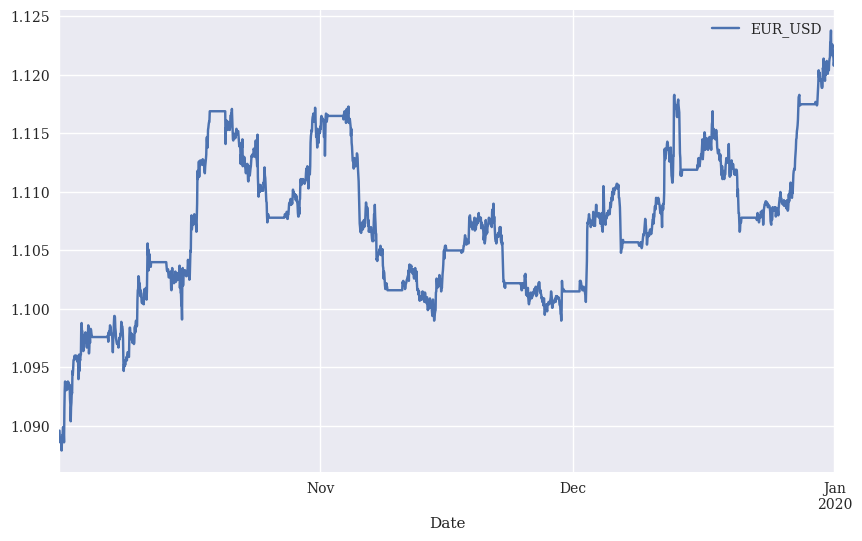

In [19]:
data.plot(figsize=(10, 6));

## Baseline Prediction

In [20]:
lags = 5

In [27]:
def add_lags(data, symbol, lags, window=20):
    cols = []
    df = data.copy()
    df.dropna(inplace=True)
    df['r'] = np.log(df / df.shift())
    df['sma'] = df[symbol].rolling(window).mean()
    df['min'] = df[symbol].rolling(window).min()
    df['max'] = df[symbol].rolling(window).max()
    df['mom'] = df['r'].rolling(window).mean()
    df['vol'] = df['r'].rolling(window).std()
    df.dropna(inplace=True)
    df['d'] = np.where(df['r'] > 0, 1, 0)
    features = [symbol, 'r', 'd', 'sma', 'min', 'max', 'mom', 'vol']
    for f in features:
        for lag in range(1, lags + 1):
            col = f'{f}_lag_{lag}'
            df[col] = df[f].shift(lag)
            cols.append(col)
    df.dropna(inplace=True)
    return df, cols

In [28]:
data, cols = add_lags(data, symbol, lags)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


ValueError: Columns must be same length as key

In [29]:
data

,EUR_USD,r,sma,min,max,mom,vol,d,EUR_USD_lag_1,EUR_USD_lag_2,...,mom_lag_1,mom_lag_2,mom_lag_3,mom_lag_4,mom_lag_5,vol_lag_1,vol_lag_2,vol_lag_3,vol_lag_4,vol_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-02 02:00:00,1.0937,-9.1429e-05,1.0916,1.0879,1.0938,2.2911e-04,0.0008,0,1.0938,1.0932,...,2.2449e-04,2.0165e-04,2.0626e-04,1.8789e-04,1.6035e-04,0.0008,0.0008,0.0008,0.0008,0.0008
2019-10-02 03:00:00,1.0937,0.0000e+00,1.0918,1.0885,1.0938,2.6586e-04,0.0008,0,1.0937,1.0938,...,2.2911e-04,2.2449e-04,2.0165e-04,2.0626e-04,1.8789e-04,0.0008,0.0008,0.0008,0.0008,0.0008
2019-10-02 04:00:00,1.0936,-9.1437e-05,1.0921,1.0886,1.0938,2.3372e-04,0.0008,0,1.0937,1.0937,...,2.6586e-04,2.2911e-04,2.2449e-04,2.0165e-04,2.0626e-04,0.0008,0.0008,0.0008,0.0008,0.0008
2019-10-02 05:00:00,1.0933,-2.7436e-04,1.0923,1.0886,1.0938,1.8786e-04,0.0008,0,1.0936,1.0937,...,2.3372e-04,2.6586e-04,2.2911e-04,2.2449e-04,2.0165e-04,0.0008,0.0008,0.0008,0.0008,0.0008
2019-10-02 06:00:00,1.0935,1.8292e-04,1.0925,1.0886,1.0938,1.9700e-04,0.0008,1,1.0933,1.0936,...,1.8786e-04,2.3372e-04,2.6586e-04,2.2911e-04,2.2449e-04,0.0008,0.0008,0.0008,0.0008,0.0008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00,1.1216,-5.3481e-04,1.1216,1.1201,1.1238,4.9061e-05,0.0006,0,1.1222,1.1226,...,9.8118e-05,1.0255e-04,1.2935e-04,1.0258e-04,7.1371e-05,0.0006,0.0006,0.0006,0.0007,0.0007
2019-12-31 21:00:00,1.1215,-8.9162e-05,1.1216,1.1201,1.1238,3.5679e-05,0.0006,0,1.1216,1.1222,...,4.9061e-05,9.8118e-05,1.0255e-04,1.2935e-04,1.0258e-04,0.0006,0.0006,0.0006,0.0006,0.0007
2019-12-31 22:00:00,1.1208,-6.2436e-04,1.1216,1.1201,1.1238,-1.7841e-05,0.0007,0,1.1215,1.1216,...,3.5679e-05,4.9061e-05,9.8118e-05,1.0255e-04,1.2935e-04,0.0006,0.0006,0.0006,0.0006,0.0006


In [24]:
len(data)

2183

In [30]:
cols

['EUR_USD_lag_1',
 'EUR_USD_lag_2',
 'EUR_USD_lag_3',
 'EUR_USD_lag_4',
 'EUR_USD_lag_5',
 'r_lag_1',
 'r_lag_2',
 'r_lag_3',
 'r_lag_4',
 'r_lag_5',
 'd_lag_1',
 'd_lag_2',
 'd_lag_3',
 'd_lag_4',
 'd_lag_5',
 'sma_lag_1',
 'sma_lag_2',
 'sma_lag_3',
 'sma_lag_4',
 'sma_lag_5',
 'min_lag_1',
 'min_lag_2',
 'min_lag_3',
 'min_lag_4',
 'min_lag_5',
 'max_lag_1',
 'max_lag_2',
 'max_lag_3',
 'max_lag_4',
 'max_lag_5',
 'mom_lag_1',
 'mom_lag_2',
 'mom_lag_3',
 'mom_lag_4',
 'mom_lag_5',
 'vol_lag_1',
 'vol_lag_2',
 'vol_lag_3',
 'vol_lag_4',
 'vol_lag_5']

In [15]:
# data.iloc[:10, :14].round(4)

In [31]:
c = data['d'].value_counts()
c

d
0    1445
1     738
Name: count, dtype: int64

In [32]:
def cw(df):
    c0, c1 = np.bincount(df['d'])
    w0 = (1 / c0) * (len(df)) / 2
    w1 = (1 / c1) * (len(df)) / 2
    return {0: w0, 1: w1}

In [33]:
class_weight = cw(data)

In [34]:
class_weight

{0: 0.755363321799308, 1: 1.4789972899728998}

In [35]:
class_weight[0] * c[0]

1091.5

In [36]:
class_weight[1] * c[1]

1091.5

In [22]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'

In [37]:
import random
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import accuracy_score

In [38]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [42]:
from keras.src.optimizers import Adam

# optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001)
optimizer = Adam(learning_rate=0.001)

In [43]:
def create_model(hl=1, hu=128, optimizer=optimizer):
    model = Sequential()
    model.add(Dense(hu, input_dim=len(cols),
                    activation='relu'))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [44]:
set_seeds()
model = create_model(hl=1, hu=128)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,889 (85.50 KB)

 Trainable params: 21,889 (85.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
%%time
model.fit(data[cols], data['d'], epochs=50,
          verbose=False, class_weight=cw(data))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)
2024-09-22 16:17:42.112140: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


CPU times: user 2.71 s, sys: 387 ms, total: 3.09 s
Wall time: 2.4 s


In [48]:
model.evaluate(data[cols], data['d'])

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.5747 - loss: 0.5962


[0.593904972076416, 0.584516704082489]

In [49]:
data['p'] = np.where(model.predict(data[cols]) > 0.5, 1, 0)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step


In [50]:
data['p'].value_counts()

p
1    1527
0     656
Name: count, dtype: int64

In [52]:
split = int(len(data) * 0.8)
split

1746

In [53]:
train = data.iloc[:split].copy()

In [54]:
test = data.iloc[split:].copy()

In [59]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=1, hu=128,optimizer=optimizer)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
%%time 
hist = model.fit(train[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 2.81 s, sys: 439 ms, total: 3.24 s
Wall time: 2.61 s


In [61]:
model.evaluate(train[cols], train['d'])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - accuracy: 0.5714 - loss: 0.6262


[0.629595160484314, 0.5756013989448547]

In [62]:
model.evaluate(test[cols], test['d'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.6189 - loss: 0.5775


[0.6130309700965881, 0.5949656963348389]

In [63]:
test['p'] = np.where(model.predict(test[cols]) > 0.5, 1, 0)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [65]:
test['p'].value_counts()

p
1    302
0    135
Name: count, dtype: int64

In [66]:
res = pd.DataFrame(hist.history)

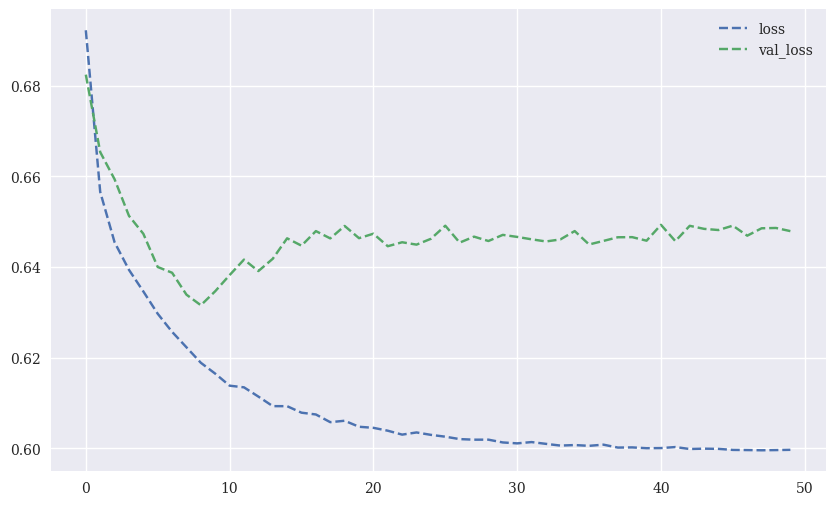

In [68]:
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

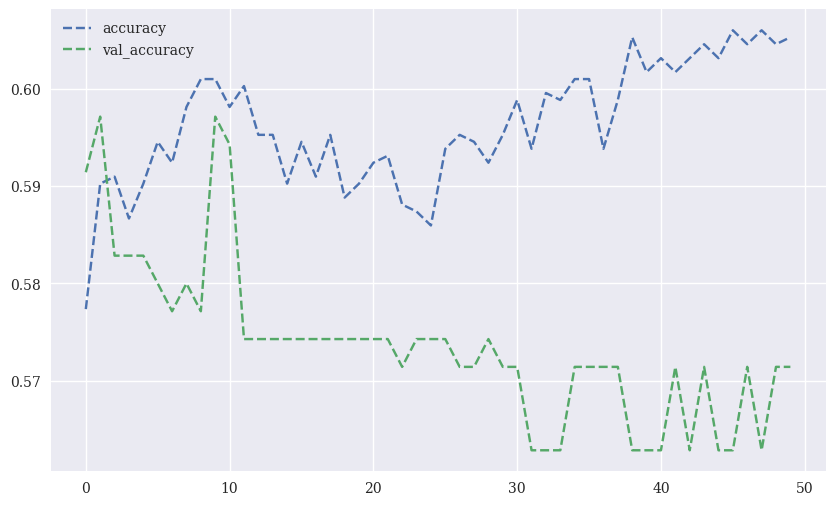

In [67]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

## Normalization

In [69]:
mu, std = train.mean(), train.std()

In [70]:
train_ = (train - mu) / std

In [45]:
# train_.std().round(3)

In [72]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=2, hu=128, optimizer=optimizer)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
%%time 
hist = model.fit(train_[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 3.18 s, sys: 438 ms, total: 3.62 s
Wall time: 2.98 s


In [74]:
model.evaluate(train_[cols], train['d'])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.9287 - loss: 0.2051


[0.4331425130367279, 0.8894616365432739]

In [75]:
test_ = (test - mu) / std

In [76]:
model.evaluate(test_[cols], test['d'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.6714 - loss: 1.3593


[1.612546443939209, 0.6361556053161621]

In [77]:
test['p'] = np.where(model.predict(test_[cols]) > 0.5, 1, 0)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [78]:
test['p'].value_counts()

p
0    343
1     94
Name: count, dtype: int64

In [79]:
res = pd.DataFrame(hist.history)

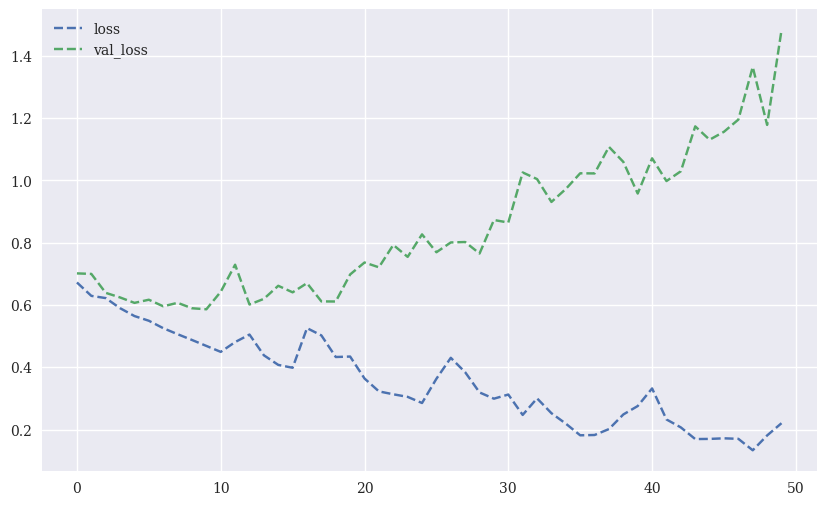

In [80]:
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

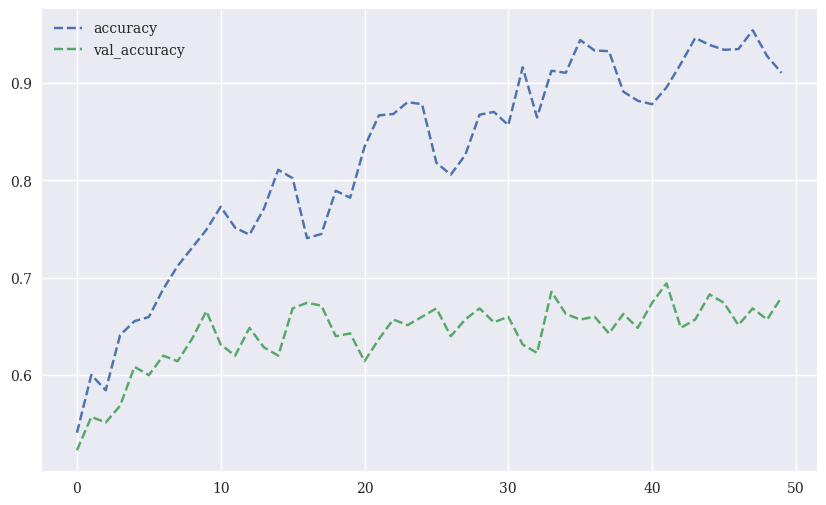

In [81]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

## Dropout 

In [82]:
from keras.layers import Dropout

In [83]:
def create_model(hl=1, hu=128, dropout=True, rate=0.3,
                 optimizer=optimizer):
    model = Sequential()
    model.add(Dense(hu, input_dim=len(cols),
                    activation='relu'))
    if dropout:
        model.add(Dropout(rate, seed=100))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu'))
        if dropout:
            model.add(Dropout(rate, seed=100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
                 metrics=['accuracy'])
    return model

In [84]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=1, hu=128, rate=0.3,optimizer=optimizer)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
%%time 
hist = model.fit(train_[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.15, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 3.12 s, sys: 421 ms, total: 3.55 s
Wall time: 2.92 s


In [86]:
model.evaluate(train_[cols], train['d'])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7931 - loss: 0.4226


[0.45998382568359375, 0.7628865838050842]

In [87]:
model.evaluate(test_[cols], test['d'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.6780 - loss: 0.5145


[0.5556485652923584, 0.6636155843734741]

In [88]:
res = pd.DataFrame(hist.history)

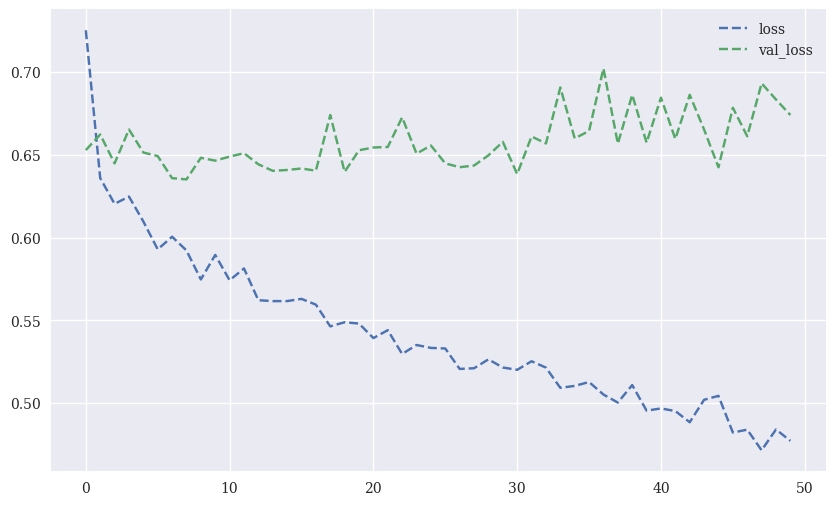

In [89]:
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

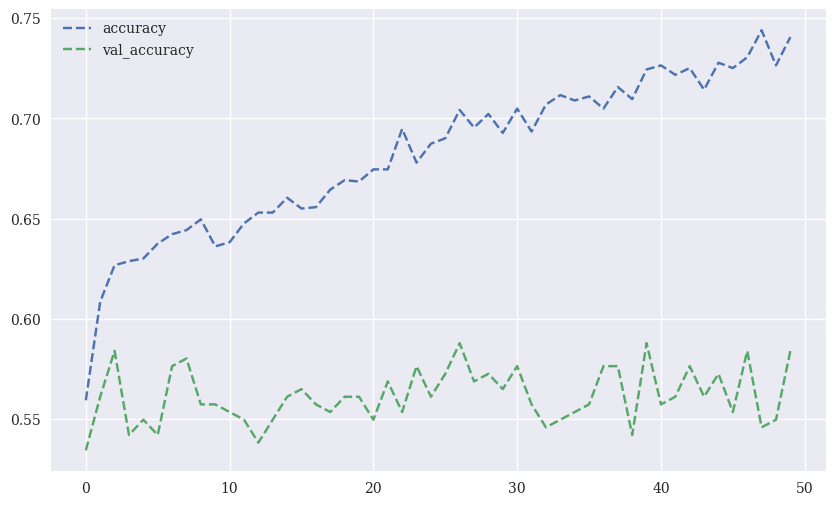

In [90]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

## Regularization 

强迫估计出来的weight绝对值不要过大
不如dropout强大，较少使用

In [91]:
from keras.regularizers import l1, l2

In [140]:
def create_model(hl=1, hu=128, dropout=False, rate=0.3, 
                 regularize=False, reg=l1(0.0005),
                 optimizer=optimizer, input_dim=len(cols)):
    optimizer = Adam(learning_rate=0.001)
    if not regularize:
        reg = None
    model = Sequential()
    model.add(Dense(hu, input_dim=input_dim,
                    activity_regularizer=reg,
                    activation='relu'))
    if dropout:
        model.add(Dropout(rate, seed=100))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu',
                        activity_regularizer=reg))
        if dropout:
            model.add(Dropout(rate, seed=100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
                 metrics=['accuracy'])
    return model

In [102]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=1, hu=128, regularize=True,optimizer=optimizer)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [103]:
%%time 
hist = model.fit(train_[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 2.87 s, sys: 419 ms, total: 3.29 s
Wall time: 2.66 s


In [104]:
model.evaluate(train_[cols], train['d'])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.8425 - loss: 0.4345


[0.4927056133747101, 0.8018327355384827]

In [105]:
model.evaluate(test_[cols], test['d'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.6767 - loss: 0.6832


[0.6954002976417542, 0.6544622182846069]

In [106]:
res = pd.DataFrame(hist.history)

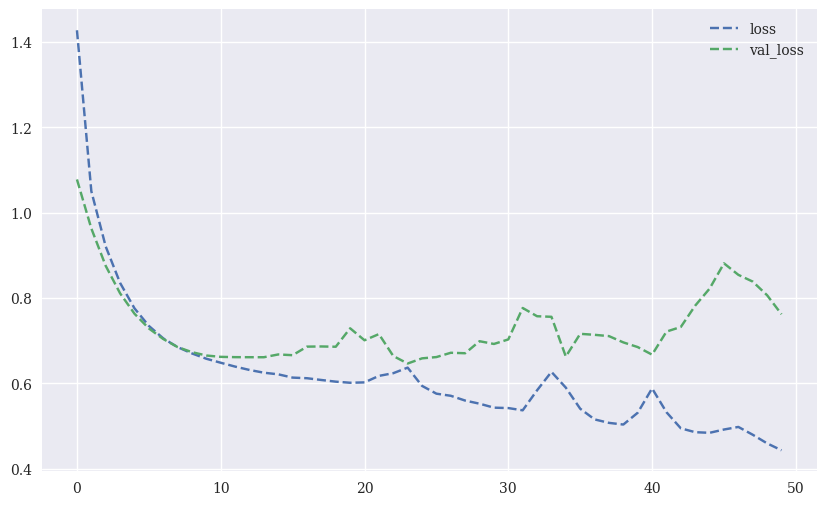

In [107]:
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

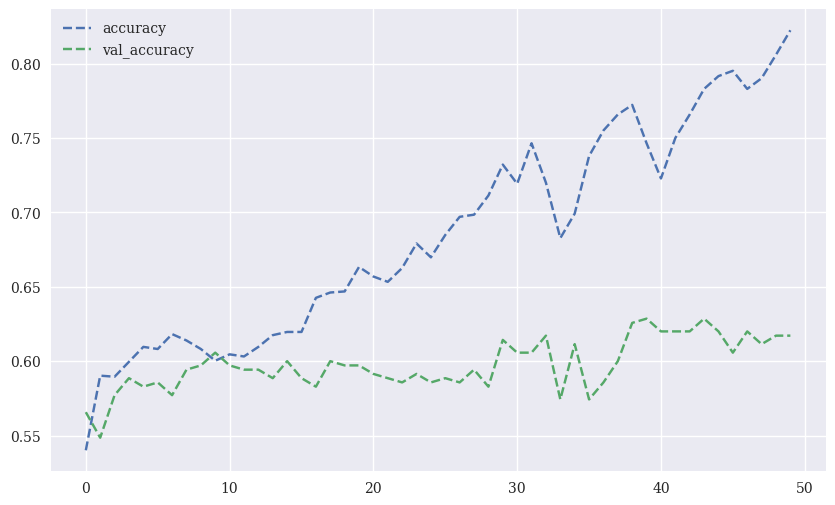

In [108]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

In [111]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
model = create_model(hl=2, hu=128,
                     dropout=True, rate=0.3,
                     regularize=True, reg=l2(0.001),optimizer=optimizer
                    )

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
%%time 
hist = model.fit(train_[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False,
          class_weight=cw(train))

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


CPU times: user 3.63 s, sys: 498 ms, total: 4.13 s
Wall time: 3.43 s


In [113]:
model.evaluate(train_[cols], train['d'])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.7798 - loss: 0.4848


[0.5114791393280029, 0.7514318227767944]

In [115]:
model.evaluate(test_[cols], test['d'])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.6639 - loss: 0.5925


[0.6176770925521851, 0.6453089118003845]

In [75]:
res = pd.DataFrame(hist.history)

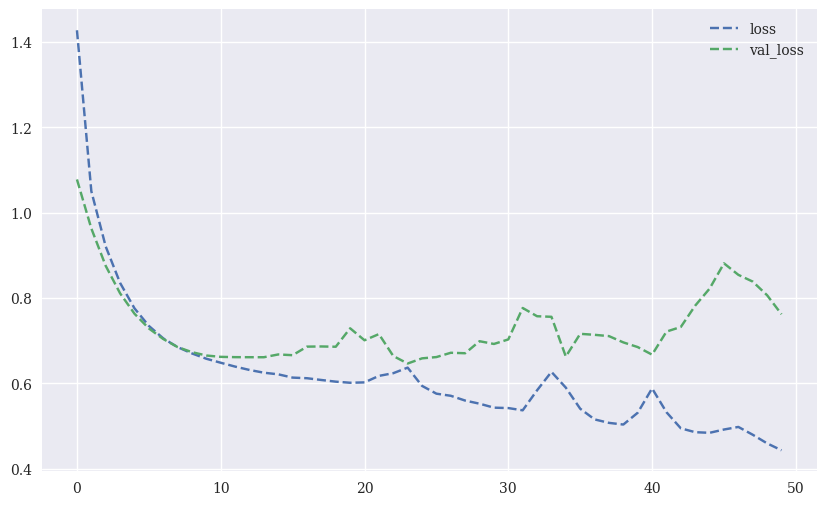

In [116]:
res[['loss', 'val_loss']].plot(figsize=(10, 6), style='--');

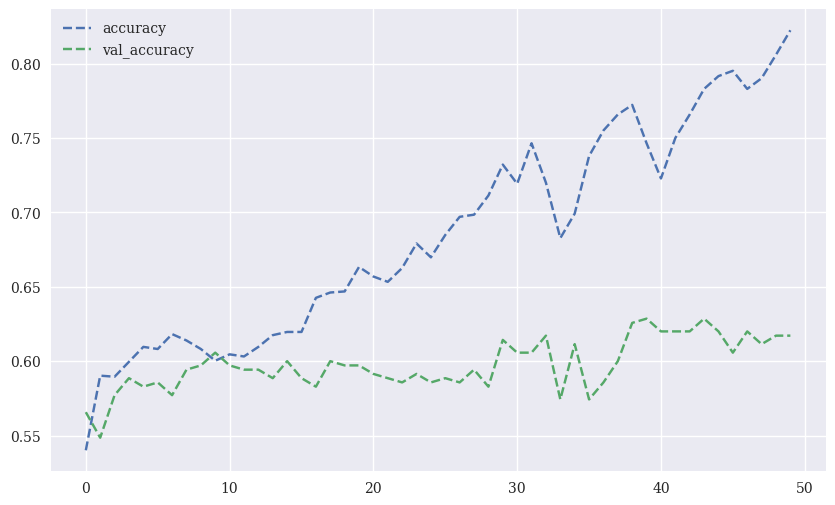

In [117]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

In [118]:
res.mean()['accuracy'] - res.mean()['val_accuracy']

0.08740000247955326

## Bagging

In [119]:
from sklearn.ensemble import BaggingClassifier
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [120]:
len(cols)

40

In [121]:
max_features = 0.75

In [142]:
set_seeds()
optimizer = Adam(learning_rate=0.001)
base_estimator = KerasClassifier(model=create_model,
                        verbose=False, epochs=20, hl=1, hu=128,
                        dropout=True, regularize=False,
                        input_dim=int(len(cols) * max_features))

In [143]:
model_bag = BaggingClassifier(estimator=base_estimator,
                          n_estimators=15,
                          max_samples=0.75,
                          max_features=max_features,
                          bootstrap=True,
                          bootstrap_features=True,
                          n_jobs=1,
                          random_state=100,
                         )
## bootstrap:是否有放回

In [144]:
%time model_bag.fit(train_[cols], train['d'])

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

CPU times: user 14.7 s, sys: 1.65 s, total: 16.4 s
Wall time: 13.8 s


BaggingClassifier(bootstrap_features=True,
                  estimator=KerasClassifier(dropout=True, epochs=20, hl=1, hu=128, input_dim=30, model=<function create_model at 0x31e801630>, regularize=False, verbose=False),
                  max_features=0.75, max_samples=0.75, n_estimators=15,
                  n_jobs=1, random_state=100)

In [145]:
model_bag.score(train_[cols], train['d'])

0.7084765177548683

In [146]:
model_bag.score(test_[cols], test['d'])

0.6613272311212814

In [147]:
test['p'] = model_bag.predict(test_[cols])

In [148]:
test['p'].value_counts()

p
0    420
1     17
Name: count, dtype: int64

## Optimizers

In [149]:
import time

In [150]:
optimizers = ['sgd', 'rmsprop', 'adagrad', 'adadelta',
              'adam', 'adamax', 'nadam']

In [152]:
def create_model(hl=1, hu=128, dropout=False, rate=0.3, 
                 regularize=False, reg=l1(0.0005),
                 optimizer=optimizer, input_dim=len(cols)):
    if not regularize:
        reg = None
    model = Sequential()
    model.add(Dense(hu, input_dim=input_dim,
                    activity_regularizer=reg,
                    activation='relu'))
    if dropout:
        model.add(Dropout(rate, seed=100))
    for _ in range(hl):
        model.add(Dense(hu, activation='relu',
                        activity_regularizer=reg))
        if dropout:
            model.add(Dropout(rate, seed=100))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer,
                 metrics=['accuracy'])
    return model

In [153]:
%%time
for optimizer in optimizers:
    set_seeds()
    model = create_model(hl=1, hu=128,
                     dropout=True, rate=0.3,
                     regularize=False, reg=l2(0.001),
                     optimizer=optimizer
                    )
    t0 = time.time()
    model.fit(train_[cols], train['d'],
              epochs=50, verbose=False,
              validation_split=0.2, shuffle=False,
              class_weight=cw(train))
    t1 = time.time()
    t = t1 - t0
    acc_tr = model.evaluate(train_[cols], train['d'], verbose=False)[1]
    acc_te = model.evaluate(test_[cols], test['d'], verbose=False)[1]
    out = f'{optimizer:10s} | time[s]: {t:.4f} | in-sample={acc_tr:.4f}'
    out += f' | out-of-sample={acc_te:.4f}'
    print(out)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


sgd        | time[s]: 2.4136 | in-sample=0.6306 | out-of-sample=0.6613


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


rmsprop    | time[s]: 2.4568 | in-sample=0.7595 | out-of-sample=0.6384


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adagrad    | time[s]: 2.4286 | in-sample=0.6243 | out-of-sample=0.6568


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adadelta   | time[s]: 2.7836 | in-sample=0.3396 | out-of-sample=0.3501


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adam       | time[s]: 2.6944 | in-sample=0.7142 | out-of-sample=0.5812


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adamax     | time[s]: 2.7596 | in-sample=0.6770 | out-of-sample=0.6430


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


nadam      | time[s]: 2.8922 | in-sample=0.7446 | out-of-sample=0.6316
CPU times: user 20.6 s, sys: 2.81 s, total: 23.4 s
Wall time: 19 s


In [154]:
test['p'] = np.where(model.predict(test_[cols]) > 0.5, 1, 0)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [155]:
test['p'].value_counts()

p
1    226
0    211
Name: count, dtype: int64

In [156]:
accuracy_score(test['p'], test['d'])

0.631578947368421

Revisited

In [158]:
%%time
for optimizer in optimizers:
    set_seeds()
    model = create_model(hl=1, hu=128,
                     dropout=True, rate=0.3,
                     regularize=False, reg=l2(0.001),
                     optimizer=optimizer
                    )
    t0 = time.time()
    h=model.fit(train_[cols], train['d'],
              epochs=50, verbose=False,
              validation_split=0.2, shuffle=False,
              class_weight=cw(train))
    t1 = time.time()
    t = t1 - t0
    # acc_tr = model.evaluate(train_[cols], train['d'], verbose=False)[1]
    # acc_te = model.evaluate(test_[cols], test['d'], verbose=False)[1]
    acc_tr = h.history['accuracy'][-1]
    acc_va = h.history['val_accuracy'][-1]
    out = f'{optimizer:10s} | time[s]: {t:.4f} | train-sample={acc_tr:.4f}'
    out += f' | val-sample={acc_va:.4f}'
    print(out)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


sgd        | time[s]: 2.7458 | train-sample=0.6275 | val-sample=0.6114


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


rmsprop    | time[s]: 2.4827 | train-sample=0.7228 | val-sample=0.6429


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adagrad    | time[s]: 2.5259 | train-sample=0.6039 | val-sample=0.5914


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adadelta   | time[s]: 2.7284 | train-sample=0.3804 | val-sample=0.3371


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adam       | time[s]: 2.6292 | train-sample=0.7328 | val-sample=0.6171


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adamax     | time[s]: 2.6378 | train-sample=0.6519 | val-sample=0.6343


/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


nadam      | time[s]: 2.8136 | train-sample=0.7371 | val-sample=0.6200
CPU times: user 20.2 s, sys: 2.74 s, total: 22.9 s
Wall time: 18.7 s


In [159]:
set_seeds()
optimizer = optimizers[4]
model = create_model(hl=1, hu=128,
                 dropout=True, rate=0.3,
                 regularize=False, reg=l2(0.001),
                 optimizer=optimizer
                )
t0 = time.time()
h=model.fit(train_[cols], train['d'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False,
          class_weight=cw(train))
t1 = time.time()
t = t1 - t0

acc_te = model.evaluate(test_[cols], test['d'], verbose=False)[1]

out = f'{optimizer:10s} | time[s]: {t:.4f} | out-of-sample={acc_te:.4f}'
print(out)

/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/zhengshuang/miniconda3/envs/aiif/lib/python3.10/site-packages/keras/src/trainers/data_adapters/data_adapter_utils.py:126: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_weight[i] = class_weight.get(int(y[i]), 1.0)


adam       | time[s]: 2.9409 | out-of-sample=0.5812


<img src='http://hilpisch.com/taim_logo.png' width="350px" align="right">

<br><br><br><a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:ai@tpq.io">ai@tpq.io</a>